  default student      balance       income
0      No      No   729.526495  44361.62507
1      No     Yes   817.180407  12106.13470
2      No      No  1073.549164  31767.13895
3      No      No   529.250605  35704.49394
4      No      No   785.655883  38463.49588


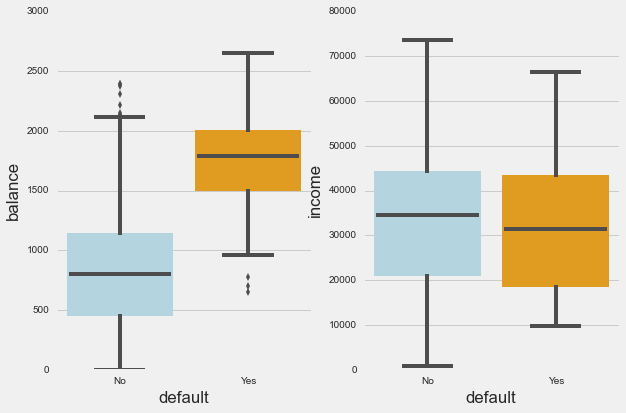

In [8]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')


np.random.seed(8)

# ----------------------------------------------------------------------------
#  Exploratory analysis of the Default Dataset
# ----------------------------------------------------------------------------

df = pd.read_csv('../data/Default.csv', index_col = False)

# 10000 rows with
df.shape
print(df.head())


# Factorize / Encode the student regressor and the default target
df['default_fact']   = df.default.factorize()[0]
df['student_fact']   = df.student.factorize()[0]

# # describe
# print(df.describe())

# # box plots balance and income vs default
fig = plt.figure(figsize=(9,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax1, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=ax2, palette=c_palette)



In [12]:
X_sm = sm.add_constant(df.balance)
# X_sm 
clf = sm.Logit(df.default_fact, X_sm).fit()
print(clf.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000       -11.359    -9.943
balance        0.0055      0.000     24.952      0.000         0.005     0.006


In [16]:
X_sm = sm.add_constant(df[['balance', 'student_fact']])

clf = sm.Logit(df.default_fact, X_sm).fit()
print(clf.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -10.7495      0.369    -29.115      0.000       -11.473   -10.026
balance          0.0057      0.000     24.748      0.000         0.005     0.006
student_fact    -0.7149      0.148     -4.846      0.000        -1.004    -0.426


In [15]:
X_sm = sm.add_constant(df[['student_fact']])

clf = sm.Logit(df.default_fact, X_sm).fit()
print(clf.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -3.5041      0.071    -49.554      0.000        -3.643    -3.366
student_fact     0.4049      0.115      3.520      0.000         0.179     0.630


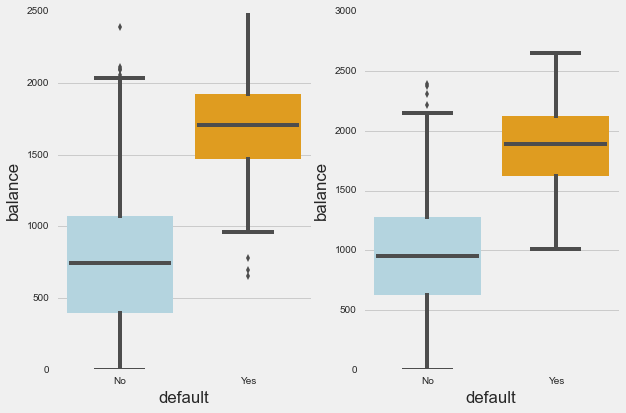

In [18]:
fig = plt.figure(figsize=(9,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

c_palette = {'No':'lightblue', 'Yes':'orange'}

sns.boxplot('default', 'balance', data=df[df.student_fact == 0], orient='v', ax=ax1, palette=c_palette)
sns.boxplot('default', 'balance', data=df[df.student_fact == 1], orient='v', ax=ax2, palette=c_palette)


In [19]:
X_sm = sm.add_constant(df[['balance','income', 'student_fact']])

clf = sm.Logit(df.default_fact, X_sm).fit()
print(clf.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -10.8690      0.492    -22.079      0.000       -11.834    -9.904
balance          0.0057      0.000     24.737      0.000         0.005     0.006
income        3.033e-06    8.2e-06      0.370      0.712      -1.3e-05  1.91e-05
student_fact    -0.6468      0.236     -2.738      0.006        -1.110    -0.184


In [22]:
# a student with a credit card balance of \$1500 and income of \$40k

yy = clf.params['const'] + clf.params['student_fact'] + clf.params['balance'] * 1500 +  clf.params['income'] * 40
p = np.exp(yy) / (1+ np.exp(yy))
print("student odds ratio :%0.2f "% yy )
print("Default Probability for Student: %0.4f"%  p )
# Probability of default for a student with a credit card balance of 1500 and income of 40k

yy = clf.params['const'] + clf.params['balance'] * 1500 +  clf.params['income'] * 40
p = np.exp(yy) / (1+ np.exp(yy))
print("Non student odds ratio :%0.2f "% yy )
print("Default Probability for Non Student: %0.4f"%  p )


student odds ratio :-2.91 
Default Probability for Student: 0.0516
Non student odds ratio :-2.26 
Default Probability for Non Student: 0.0941


In [24]:

from sklearn.metrics import confusion_matrix
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,0,0,1,1,0,1,1,1,1]
confusion_matrix(y_true, y_pred)



array([[3, 2],
       [1, 4]])

In [25]:
?confusion_matrix